In [34]:
import os
import glob
import pathlib
from pathlib import Path

import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

from itertools import chain

from PIL import Image

In [35]:
sns.set(rc={'figure.figsize':(20,12)}, font_scale=2)

In [58]:
rootdir = os.getcwd()
print(rootdir)
searchstring = 'Es1\\Label'

clinical_assessment_files = []
supplementary_info_files = []

for rootdir, dirs, files in os.walk(rootdir):
    for subdir in dirs:
        subdir_name = os.path.join(rootdir, subdir)
        if searchstring in subdir_name:
            onlyfiles = [f for f in os.listdir(subdir_name) if os.path.isfile(os.path.join(subdir_name, f))]
            clinical_assessment_files.append(os.path.join(subdir_name, onlyfiles[0]))
            supplementary_info_files.append(os.path.join(subdir_name, onlyfiles[1]))


suppinfo_df = []
clinical_df = []

for file in supplementary_info_files:
    print(file)
    data = pd.read_excel(file)
    suppinfo_df.append(data)
    
for file in clinical_assessment_files:
    data = pd.read_excel(file)
    clinical_df.append(data)

suppinfo_df = pd.concat(suppinfo_df, ignore_index=True)
clinical_df = pd.concat(clinical_df, ignore_index=True)

kimore_df = suppinfo_df.merge(clinical_df, on='Subject ID')
display(kimore_df)

D:\Misc\KiMoRe
D:\Misc\KiMoRe\GPP\BackPain\B_ID1\Es1\Label\SuppInfo_B_ID1.xlsx


TypeError: read_excel() got an unexpected keyword argument 'encoding'

In [51]:
display(kimore_df[kimore_df.isna().any(axis=1)])

,Subject ID,Group,Age,Gender,clinical TS Ex#1,clinical TS Ex#2,clinical TS Ex#3,clinical TS Ex#4,clinical TS Ex#5,clinical PO Ex#1,clinical PO Ex#2,clinical PO Ex#3,clinical PO Ex#4,clinical PO Ex#5,clinical CF Ex#1,clinical CF Ex#2,clinical CF Ex#3,clinical CF Ex#4,clinical CF Ex#5
7,B_ID8,B,36,M,44.333333,48.666667,45.666667,NaN,29.333333,14.333333,14.333333,15.0,NaN,7.000000,30.0,34.333333,30.666667,NaN,22.333333
42,E_ID17,E,45,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,E_ID8,E,22,F,48.666667,NaN,46.333333,45.666667,41.333333,14.666667,NaN,15.0,13.333333,12.666667,34.0,NaN,31.333333,32.333333,28.666667


In [52]:
totalscore_df = kimore_df.filter(like='TS', axis=1)
group_col = kimore_df["Group"]
totalscore_df = totalscore_df.rename(columns={"clinical TS Ex#1": 1, "clinical TS Ex#2": 2, "clinical TS Ex#3": 3, "clinical TS Ex#4": 4, "clinical TS Ex#5": 5})
totalscore_df = totalscore_df.join(group_col)

display(totalscore_df)

,1,2,3,4,5,Group
0,41.000000,16.000000,26.000000,23.000000,22.000000,B
1,38.000000,45.000000,35.000000,26.000000,36.000000,B
2,28.210081,31.605061,25.178138,29.462784,16.245854,B
3,33.339733,31.299278,38.358822,36.262890,32.118419,B
4,44.333333,35.000000,36.666667,40.000000,43.333333,B
...,...,...,...,...,...,...
73,40.666667,28.666667,38.000000,31.333333,21.333333,NE
74,43.666667,42.666667,42.333333,29.333333,33.000000,NE
75,42.000000,30.000000,41.000000,33.000000,39.000000,NE
76,40.000000,26.000000,33.000000,26.000000,42.000000,NE


In [53]:
def ts_to_rating(item):
    if (item <= 25):
        return 1
    elif (item > 25 and item <= 37):
        return 2
    elif (item > 37):
        return 3
    else:
        return None

In [54]:
totalscore_df["rating_1"] = totalscore_df[1].apply(ts_to_rating)
totalscore_df["rating_2"] = totalscore_df[2].apply(ts_to_rating)
totalscore_df["rating_3"] = totalscore_df[3].apply(ts_to_rating)
totalscore_df["rating_4"] = totalscore_df[4].apply(ts_to_rating)
totalscore_df["rating_5"] = totalscore_df[5].apply(ts_to_rating)

In [55]:
kimore_df["r1"] = kimore_df["clinical TS Ex#1"].apply(ts_to_rating)
kimore_df["r2"] = kimore_df["clinical TS Ex#2"].apply(ts_to_rating)
kimore_df["r3"] = kimore_df["clinical TS Ex#3"].apply(ts_to_rating)
kimore_df["r4"] = kimore_df["clinical TS Ex#4"].apply(ts_to_rating)
kimore_df["r5"] = kimore_df["clinical TS Ex#5"].apply(ts_to_rating)

In [56]:
display(kimore_df)

,Subject ID,Group,Age,Gender,clinical TS Ex#1,clinical TS Ex#2,clinical TS Ex#3,clinical TS Ex#4,clinical TS Ex#5,clinical PO Ex#1,...,clinical CF Ex#1,clinical CF Ex#2,clinical CF Ex#3,clinical CF Ex#4,clinical CF Ex#5,r1,r2,r3,r4,r5
0,B_ID1,B,66,F,41.000000,16.000000,26.000000,23.000000,22.000000,15.000000,...,26.000000,11.000000,17.000000,19.000000,17.000000,3.0,1.0,2.0,1.0,1.0
1,B_ID2,B,52,M,38.000000,45.000000,35.000000,26.000000,36.000000,12.000000,...,26.000000,30.000000,27.000000,23.000000,23.000000,3.0,3.0,2.0,2.0,2.0
2,B_ID3,B,78,F,28.210081,31.605061,25.178138,29.462784,16.245854,9.394392,...,18.815689,21.541360,24.752473,19.275704,16.240707,2.0,2.0,2.0,2.0,1.0
3,B_ID4,B,52,F,33.339733,31.299278,38.358822,36.262890,32.118419,7.783826,...,25.555907,20.543484,27.360633,24.264950,30.204493,2.0,2.0,3.0,2.0,2.0
4,B_ID5,B,72,M,44.333333,35.000000,36.666667,40.000000,43.333333,13.000000,...,31.333333,24.333333,24.333333,29.666667,31.000000,3.0,2.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NE_ID5,NE,31,M,40.666667,28.666667,38.000000,31.333333,21.333333,13.000000,...,27.666667,19.666667,28.333333,22.333333,11.666667,3.0,2.0,3.0,2.0,1.0
74,NE_ID6,NE,28,M,43.666667,42.666667,42.333333,29.333333,33.000000,14.000000,...,29.666667,30.000000,29.000000,22.333333,21.666667,3.0,3.0,3.0,2.0,2.0
75,NE_ID7,NE,26,M,42.000000,30.000000,41.000000,33.000000,39.000000,15.000000,...,27.000000,21.000000,26.000000,30.000000,27.000000,3.0,2.0,3.0,2.0,3.0
76,NE_ID8,NE,58,F,40.000000,26.000000,33.000000,26.000000,42.000000,15.000000,...,25.000000,21.000000,21.000000,23.000000,27.000000,3.0,2.0,2.0,2.0,3.0


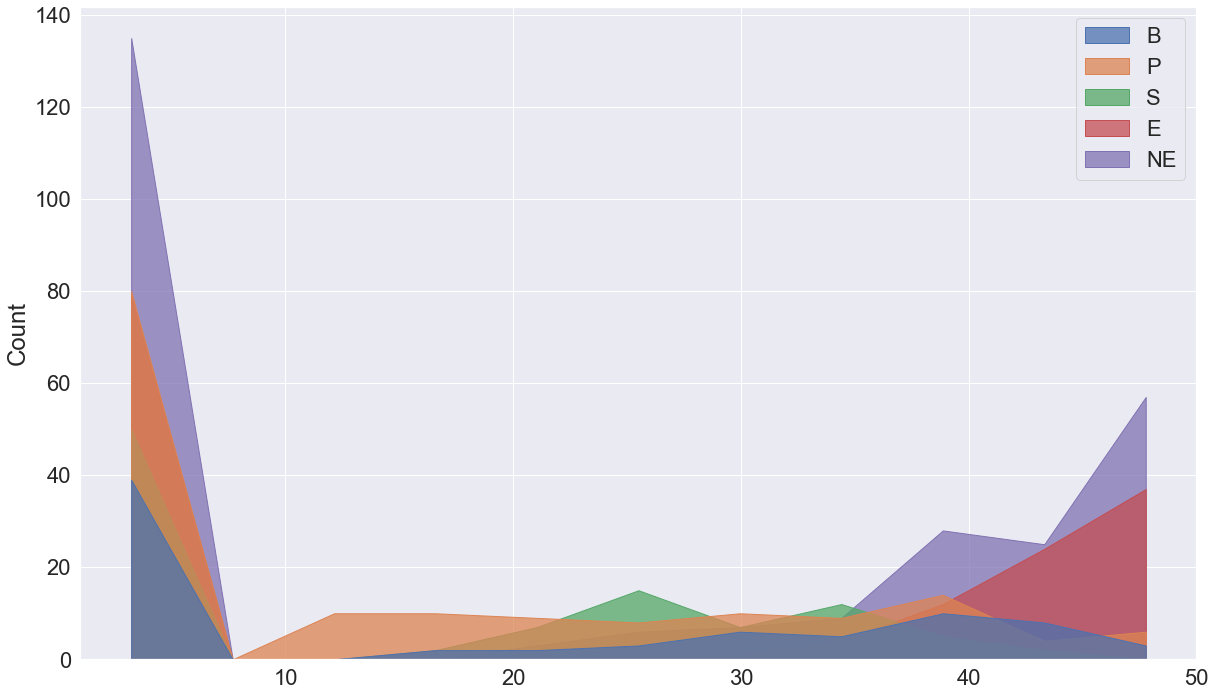

In [57]:
backpain_list = totalscore_df[totalscore_df['Group'] == 'B'].drop('Group', axis=1).to_numpy().flatten()
parkinsons_list = totalscore_df[totalscore_df['Group'] == 'P'].drop('Group', axis=1).to_numpy().flatten()
stroke_list = totalscore_df[totalscore_df['Group'] == 'S'].drop('Group', axis=1).to_numpy().flatten()
expert_list = totalscore_df[totalscore_df['Group'] == 'E'].drop('Group', axis=1).to_numpy().flatten()
notexpert_list = totalscore_df[totalscore_df['Group'] == 'NE'].drop('Group', axis=1).to_numpy().flatten()

group_df = pd.DataFrame([backpain_list, parkinsons_list, stroke_list, expert_list, notexpert_list]).T
group_df = group_df.rename(columns={0: "B", 1: "P", 2: "S", 3: "E", 4: "NE"})

group_hist = sns.histplot(data=group_df, element="poly")

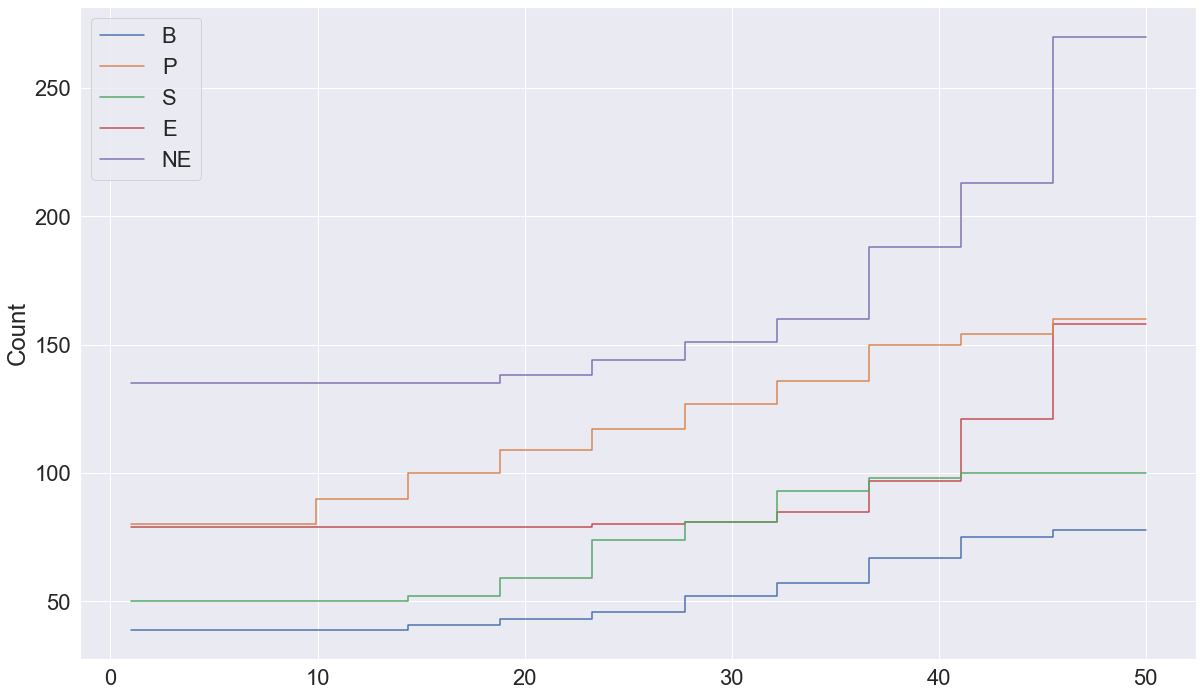

In [44]:
cumulative = sns.histplot(data=group_df, log_scale=False, element="step", fill=False, cumulative=True, stat="count", common_norm=True)

C:\Users\charl\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


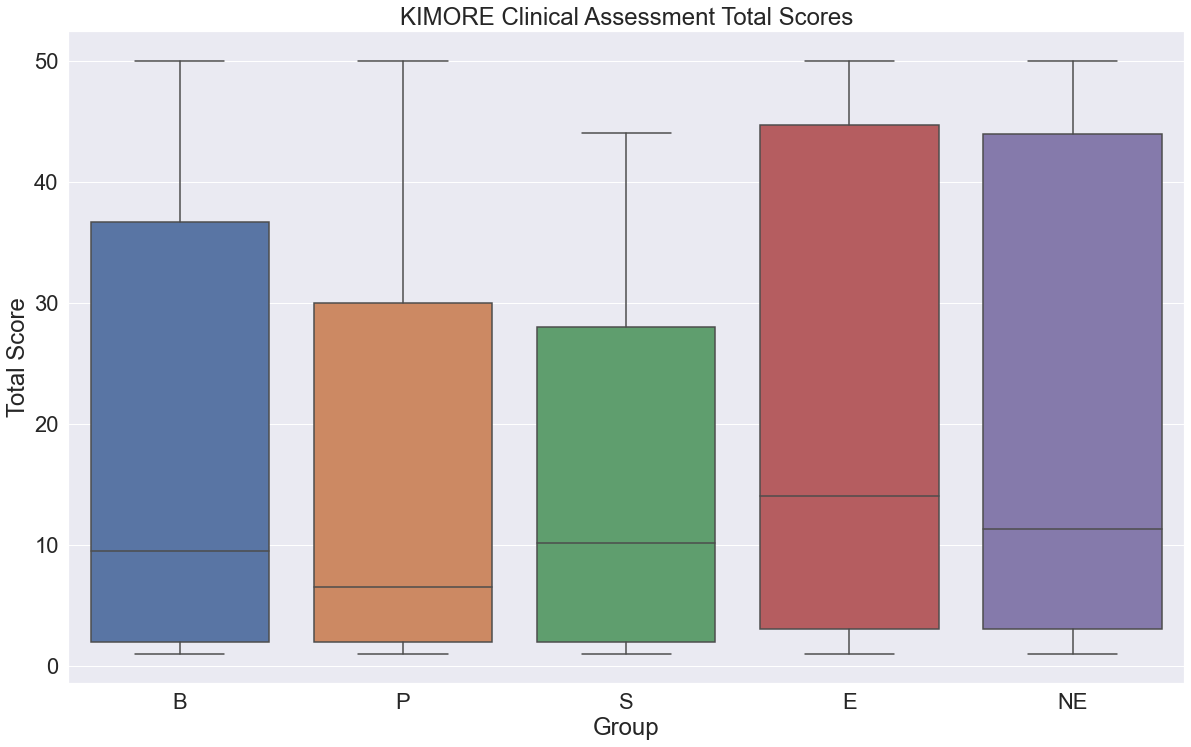

In [45]:
ax= plt.subplot()

boxplot = sns.boxplot(data=group_df)
boxplot.set(xlabel='Group', ylabel='Total Score', title='KIMORE Clinical Assessment Total Scores')

fig = boxplot.get_figure()
fig.savefig("kimore-totalscore-boxplot.png")

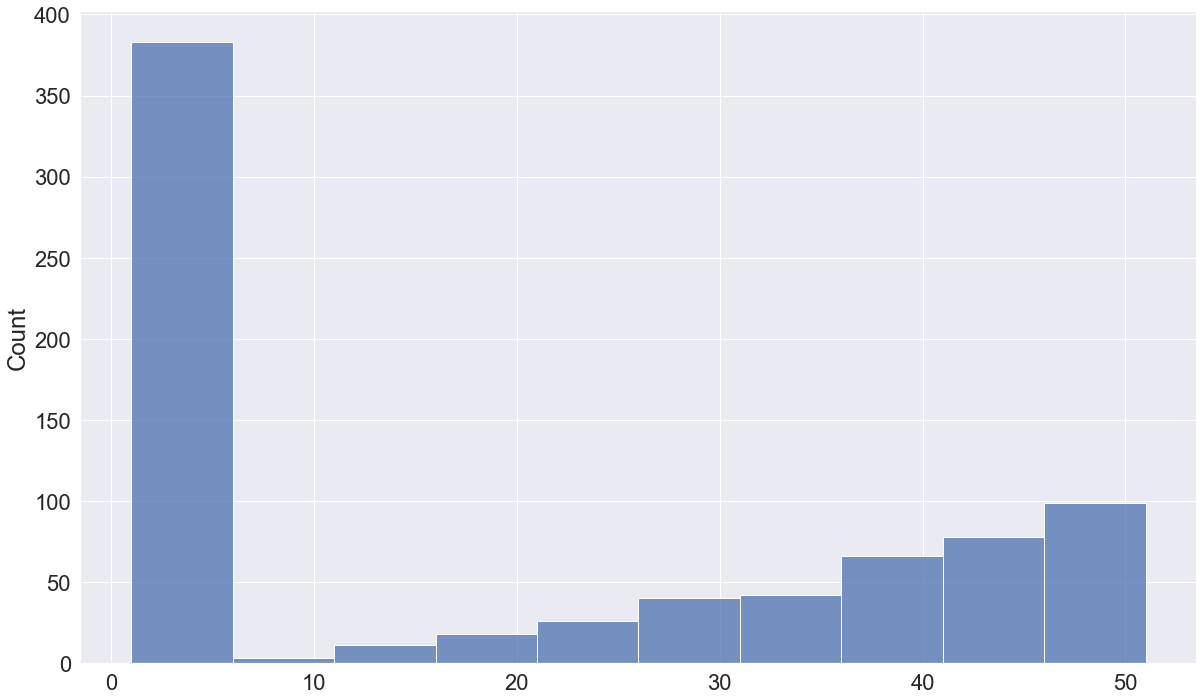

In [26]:
totalscore_list = list(chain(backpain_list, parkinsons_list, stroke_list, expert_list, notexpert_list))
totalboxplot = sns.histplot(x=totalscore_list, binwidth=5)

3*:  223
2*:  106
1*:  437
0.1409921671018277
Number of NaN values =  14


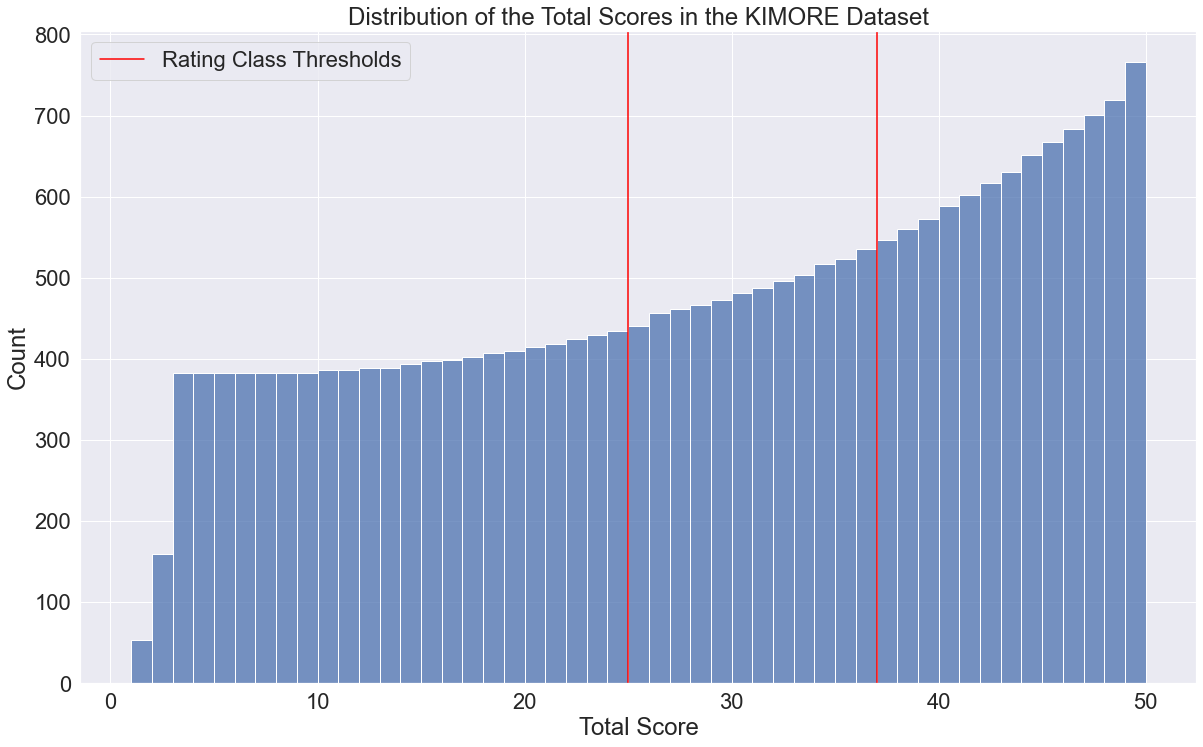

In [31]:
ax = plt.subplot()

total_cumulative = sns.histplot(data=totalscore_list, log_scale=False, fill=True, cumulative=True, stat="count", binwidth=1, common_norm=True)
total_cumulative.set(xlabel='Total Score', title='Distribution of the Total Scores in the KIMORE Dataset')

total_cumulative.axvline(25, color='red')
total_cumulative.axvline(37, color='red')

plt.legend(["Rating Class Thresholds"])

print("3*: ", sum(i > 37 for i in totalscore_list))
print("2*: ", sum(i > 25 and i <= 37 for i in totalscore_list))
print("1*: ", sum(i <= 25 for i in totalscore_list))

print(54 / (223 + 106 + 54))

print("Number of NaN values = ", sum(math.isnan(x) for x in totalscore_list))

fig = total_cumulative.get_figure()
fig.savefig("kimore-totalscore_cumulative.png")

plt.show(total_cumulative)

In [28]:
def calculate_class_weight(num_samples):
    return ((1 - (num_samples / 383)))

class_weights = [calculate_class_weight(54), calculate_class_weight(106), calculate_class_weight(223)]

### NEED TO PASS ^^^^ THIS LIST STRAIGHT TO class_weights SOMEHOW

In [11]:
#print(dict(zip(ratings_onehot.argmax(), class_weights)))

print(class_weights)

## TRY DIFFERENT COMBINATIONS OF CLASS WEIGHTS
## USE CODE ABOVE FOR CONVERTING TO DICT USING argmax() (argmax returns the index of the onehot encoding - class weights takes index of each class)

[0.8590078328981723, 0.7232375979112271, 0.4177545691906005]


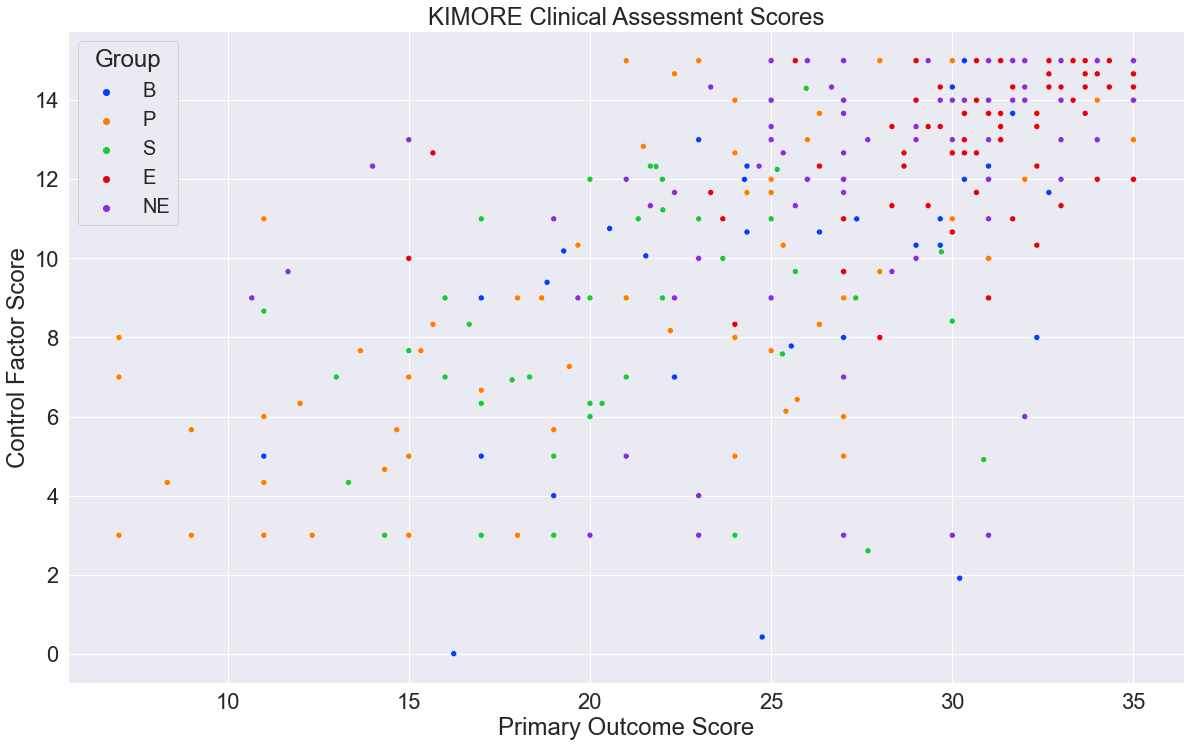

In [30]:
ax= plt.subplot()

scatter = sns.scatterplot(data=kimore_df, x='clinical CF Ex#1', y='clinical PO Ex#1', hue='Group', palette='bright', ax=ax)
scatter = sns.scatterplot(data=kimore_df, x='clinical CF Ex#2', y='clinical PO Ex#2', hue='Group', palette='bright', legend=False, ax=ax)
scatter = sns.scatterplot(data=kimore_df, x='clinical CF Ex#3', y='clinical PO Ex#3', hue='Group', palette='bright', legend=False, ax=ax)
scatter = sns.scatterplot(data=kimore_df, x='clinical CF Ex#4', y='clinical PO Ex#4', hue='Group', palette='bright', legend=False, ax=ax)
scatter = sns.scatterplot(data=kimore_df, x='clinical CF Ex#5', y='clinical PO Ex#5', hue='Group', palette='bright', legend=False, ax=ax)

scatter.set(xlabel='Primary Outcome Score', ylabel='Control Factor Score', title='KIMORE Clinical Assessment Scores')
plt.legend(fontsize='small', loc='upper left', title='Group', title_fontsize='medium')

fig = scatter.get_figure()
fig.savefig("kimore-score-scatterplot.png")

plt.show(scatter)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

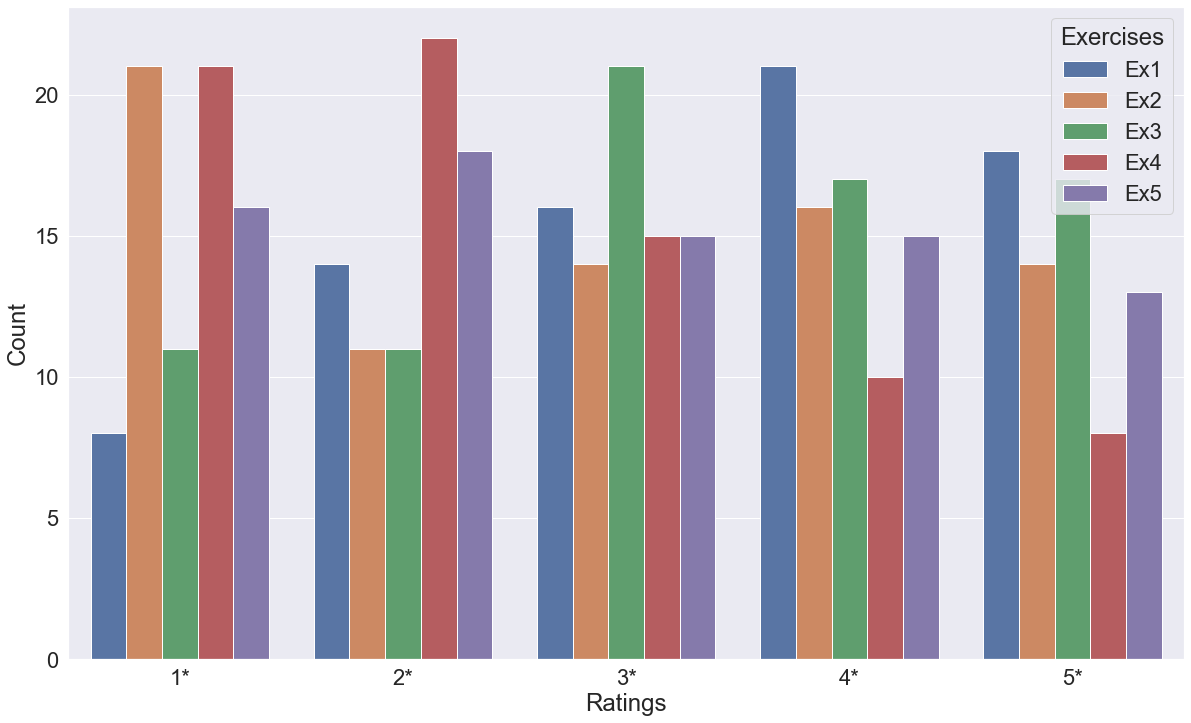

In [33]:
ex1_cols = [col for col in clinical_df.columns if '1' in col]
ex2_cols = [col for col in clinical_df.columns if '2' in col]
ex3_cols = [col for col in clinical_df.columns if '3' in col]
ex4_cols = [col for col in clinical_df.columns if '4' in col]
ex5_cols = [col for col in clinical_df.columns if '5' in col]

# add .join(group_col) for group info
ex1_df = clinical_df.filter(ex1_cols, axis='columns')
ex2_df = clinical_df.filter(ex2_cols, axis='columns')
ex3_df = clinical_df.filter(ex3_cols, axis='columns')
ex4_df = clinical_df.filter(ex4_cols, axis='columns')
ex5_df = clinical_df.filter(ex5_cols, axis='columns')

# total score lists for each exercise
ex1_totalscore = ex1_df['clinical TS Ex#1'].tolist()
ex2_totalscore = ex2_df['clinical TS Ex#2'].tolist()
ex3_totalscore = ex3_df['clinical TS Ex#3'].tolist()
ex4_totalscore = ex4_df['clinical TS Ex#4'].tolist()
ex5_totalscore = ex5_df['clinical TS Ex#5'].tolist()

totalscores = [ex1_totalscore, ex2_totalscore, ex3_totalscore, ex4_totalscore, ex5_totalscore]

# count number of sequences in each exercise above each threshold
i = 1
five_star = []
four_star = []
three_star = []
two_star = []
one_star = []
for exercise in totalscores:
    five_star.append(sum(i > 47 for i in exercise))
    four_star.append(sum(i >= 42.7 and i <= 47 for i in exercise))
    three_star.append(sum(i >= 36.9 and i < 42.7 for i in exercise))
    two_star.append(sum(i >= 27.3 and i < 36.9 for i in exercise))
    one_star.append(sum(i < 27.3 for i in exercise))
    i = i+1

exercises = ["Ex1", "Ex2", "Ex3", "Ex4", "Ex5"]
ratings = ["1*", "2*", "3*", "4*", "5*"]
ratings_df = pd.DataFrame([one_star, two_star, three_star, four_star, five_star], columns=exercises, index=ratings)
ratings_df = ratings_df.T
ratings_df = ratings_df.rename_axis('Exercises')
ratings_df = ratings_df.reset_index(level=0)
ratings_df = (ratings_df.set_index('Exercises')
         .stack()
         .reset_index(name='Count')
         .rename(columns={'level_1':'Ratings'}))

ratings_barplot = sns.barplot(data=ratings_df, x="Ratings", y="Count", hue="Exercises")
for i in ratings_barplot.containers:
    ratings_barplot.bar_label(i,)

In [ ]:
exercises_barplot = sns.barplot(data=ratings_df, x="Exercises", y="Count", hue="Ratings")
for i in exercises_barplot.containers:
    exercises_barplot.bar_label(i,)